In [48]:
#read the subdataset 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# read the entire file into a python array
with open('/Users/kzhao46/Downloads/628-2/data/review_train.json', 'rb') as f:
    data = f.readlines(10000000)

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)


data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
data_df = pd.read_json(data_json_str)

In [49]:
print("Shape of the dataset:")
print(data_df.shape)

Shape of the dataset:
(15056, 4)


In [50]:
print("Column names:")
print(data_df.columns)

Column names:
Index([u'business_id', u'date', u'stars', u'text'], dtype='object')


In [51]:
print("Datatype of each column:")
print(data_df.dtypes)

Datatype of each column:
business_id             int64
date           datetime64[ns]
stars                   int64
text                   object
dtype: object


In [52]:
print("Few dataset entries:")
data_df.head()

Few dataset entries:


,business_id,date,stars,text
0,31292,2013-05-07 04:34:36,1,Total bill for this horrible service? Over $8G...
1,35344,2017-01-14 21:30:33,5,I *adore* Travis at the Hard Rock's new Kelly ...
2,152538,2016-11-09 20:09:03,5,I have to say that this office really has it t...
3,71871,2018-01-09 20:56:38,5,Went in for a lunch. Steak sandwich was delici...
4,64913,2018-01-30 23:07:38,1,Today was my second out of three sessions I ha...


In [53]:
#create a new column for the number of words in text
data_df['length'] = data_df['text'].apply(len)
data_df.head()

,business_id,date,stars,text,length
0,31292,2013-05-07 04:34:36,1,Total bill for this horrible service? Over $8G...,204
1,35344,2017-01-14 21:30:33,5,I *adore* Travis at the Hard Rock's new Kelly ...,1561
2,152538,2016-11-09 20:09:03,5,I have to say that this office really has it t...,615
3,71871,2018-01-09 20:56:38,5,Went in for a lunch. Steak sandwich was delici...,407
4,64913,2018-01-30 23:07:38,1,Today was my second out of three sessions I ha...,3509


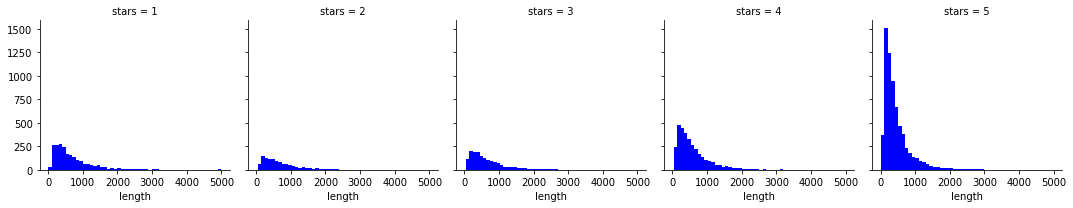

In [54]:
#cor stars vs length
graph = sns.FacetGrid(data=data_df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

In [61]:
#Normalization
#A-a
data_df['text']=data_df['text'].apply(lambda sen:" ".join(x.lower() for x in sen.split())) 
#remove punctuations
data_df['text'] = data_df['text'].str.replace('[^\w\s]','') 
data_df['text']

0        total bill for this horrible service over 8gs ...
1        i adore travis at the hard rocks new kelly car...
2        i have to say that this office really has it t...
3        went in for a lunch steak sandwich was delicio...
4        today was my second out of three sessions i ha...
5        ill be the first to admit that i was not excit...
6        tracy dessert had a big name in hong kong and ...
7        this place has gone down hill clearly they hav...
8        its a giant best buy with 66 registers i dont ...
9        like walking back in time every saturday morni...
10       walked in around 4 on a friday afternoon we sa...
11       wow so surprised at the one and two star revie...
12       michael from red carpet vip is amazing i reach...
13       i cannot believe how things have changed in 3 ...
14       you cant really find anything wrong with this ...
15       great lunch today staff was very helpful in as...
16       weve been a huge slims fan since they opened o.

In [57]:
#Tokenization
from nltk.corpus import stopwords
stop = stopwords.words('english')


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/kzhao46/nltk_data'
    - '/anaconda3/nltk_data'
    - '/anaconda3/share/nltk_data'
    - '/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [62]:
#n't to not
data_df['text']=data_df['text'].apply(lambda sen: re.sub(r"n\'t", "not", text) for x in sen.split())

NameError: name 'sen' is not defined

In [30]:

#count the words
from collections import Counter

text = ' '.join(data_df['text'].tolist())
review_word = text.split(' ')
all_reviews = ' '.join(review_word)
words = all_reviews.split()

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints = []
for review in review_word:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
print('Unique words: ', len((vocab_to_int)))

('Unique words: ', 86244)


In [ ]:
#去掉常用无用词
#去掉或替换不常用词

In [15]:
#常见
print('Unique words: ', len((vocab_to_int)))
counts.most_common(20)

('Unique words: ', 86244)


[(u'the', 65144),
 (u'and', 54948),
 (u'I', 41282),
 (u'a', 39395),
 (u'to', 38539),
 (u'was', 28091),
 (u'of', 22847),
 (u'is', 19116),
 (u'for', 18290),
 (u'in', 16481),
 (u'The', 13893),
 (u'it', 13736),
 (u'with', 13032),
 (u'my', 12791),
 (u'that', 12320),
 (u'but', 10611),
 (u'on', 10477),
 (u'have', 9914),
 (u'you', 9840),
 (u'this', 9523)]

In [60]:
#
freq = pd.Series(' '.join(data_df['text']).split()).value_counts()[-20:]
freq

embody            1
yearolds          1
varit             1
kopi              1
n9tified          1
thenhate          1
102916            1
expansions        1
tuned             1
lasagnaand        1
officials         1
reinforcements    1
baylee            1
tens              1
debutantes        1
mago              1
inundate          1
stratton          1
pecancream        1
sooth             1
dtype: int64